# Moment-Based Descriptors
## Mean
- ***Expected value*** of random variable $X$, is a measure of the central tendency of the distribution of $X$. It is represented by $\mathbb{E}\vert X\vert$, and is the value we expect to obtain "on average" if we continue to take observations of $X$ and average out the results. The mean of a discrete distribution with PMF $p(x)$ is
$$
\mathbb{E}\vert X\vert = \sum_{x}xp(x)
$$
- The mean of continuous random variable, with PDF $f(x)$ is
$$
\mathbb{E}\vert X\vert = \int_{-\infty}^{\infty}xf(x)dx
$$




In [1]:
using QuadGK

sup = (-1,1)
f1(x) = 3/4*(1-x^2)
f2(x) = x < 0 ? x+1 : 1-x

expect(f,support) = quadgk(x -> x*f(x), support...)[1]

println("Mean 1: ", expect(f1,sup))
println("Mean 2: ", expect(f2,sup))

Mean 1: 0.0
Mean 2: -2.0816681711721685e-17


## Variance
- The ***variance*** of a random variable $X$, often denoted as $Var(X)$ or $\sigma^{2}$, is a measure of the spread, or *dispersion*, of the distribution of $X$. It is defined by
$$
{\rm Var}(X) = \mathbb{E}[(X-\mathbb{E}[X])^{2}] = \mathbb{E}[X^{2}] - \big(\mathbb{E}[X]\big)^{2}
$$
- Therefore, for discrete:
$$
{\rm Var}(X) = \mathbb{E}[X^{2}] - \big(\mathbb{E}[X]\big)^{2} = \sum_{x}x^{2}p(x) - \bigg[\sum_{x}xp(x)\bigg]^{2}
$$
- For continuous:
$$
{\rm Var}(X) = \mathbb{E}[X^{2}] - \big(\mathbb{E}[X]\big)^{2} = \int_{-\infty}^{\infty}x^{2}f(x)dx - \bigg[\int_{-\infty}^{\infty}xf(x)dx\bigg]^{2}
$$
- Besides, the variance of $X$ can also be considered as the expectation of a new random variable, $Y=(X-\mathbb{E}[X])^{2}$.
- Simulation by Julia $f(x) = \left\{\begin{array}{ll}x-4 &\quad\text{for }x\in [4,5],\\6-x&\quad\text{for }x \in (5,6].\end{array}\right.$


Mean: 0.1665997406124123, Variance: 0.166599889241931


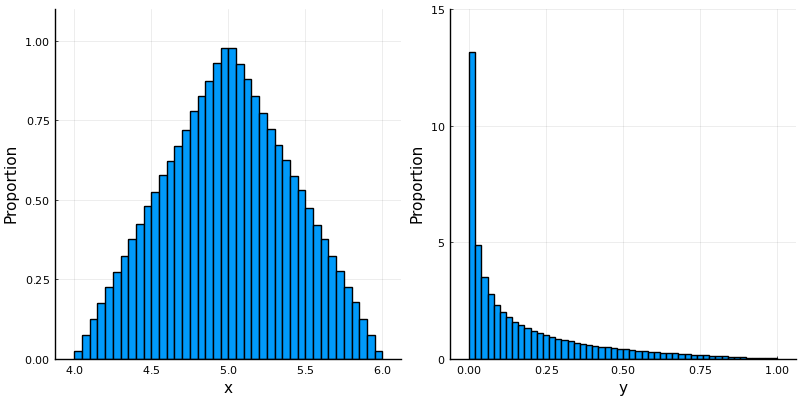

In [2]:
using Distributions, Plots;pyplot()

dist = TriangularDist(4,6,5)
N = 10^6
data = rand(dist,N)
yData = (data .- 5).^2

println("Mean: ", mean(yData), ", Variance: ", var(data))

p1 = histogram(data, xlabel="x", bins=80, normed=true, ylims=(0,1.1))
p2 = histogram(yData, xlabel="y", bins=80, normed=true, ylims=(0, 15))
plot(p1,p2, ylabel="Proportion", size=(800,400), legend=:none)

Mean: 0.9979034939086379, Variance: 0.9979041497509857


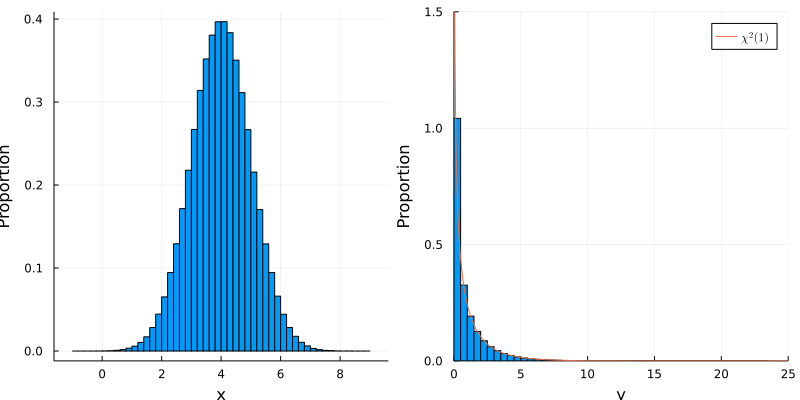

In [56]:
using Distributions, Plots, LaTeXStrings;gr()

dist = Normal(4,1)
N = 10^6
data = rand(dist,N)
yData = (data .- 4).^2

println("Mean: ", mean(yData), ", Variance: ", var(data))

p1 = histogram(data, xlabel="x", bins=80, normed=true, legend=:none)
p2 = histogram(yData, xlabel="y", bins=80, normed=true, label="")
p2 = plot!(x->pdf(Chisq(1),x), xlims=(0,25),ylims=(0,1.5), label=L"\chi^{2}(1)")
plot(p1,p2, ylabel="Proportion", size=(800,400))